In [1]:
# Cell 1: Setup and Generate Singapore Dengue Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("DENGUE OUTBREAK PREDICTION - SINGAPORE")
print("="*70)

# Generate realistic Singapore dengue data (2021-2023)
# Singapore typically has 2 peak seasons: June-August and October-December
np.random.seed(42)

start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2023-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='W')  # Weekly data

print(f"Generating dengue surveillance data:")
print(f"  Period: {start_date.date()} to {end_date.date()}")
print(f"  Frequency: Weekly reports ({len(date_range)} weeks)")

DENGUE OUTBREAK PREDICTION - SINGAPORE
Generating dengue surveillance data:
  Period: 2021-01-01 to 2023-12-31
  Frequency: Weekly reports (157 weeks)


In [2]:
# Cell 2: Simulate Realistic Dengue Cases with Weather Correlation
print("SIMULATING DENGUE CASES WITH WEATHER PATTERNS")
print("="*70)

def generate_dengue_data(date_range):
    """
    Generate realistic dengue cases for Singapore with:
    - Seasonal patterns (higher in warm, humid months)
    - Weather correlations (temperature, rainfall, humidity)
    - Outbreak events
    """
    data = []
    
    for i, date in enumerate(date_range):
        # Weather data (realistic for Singapore)
        month = date.month
        
        # Temperature (°C) - Singapore is tropical, 25-32°C year-round
        if month in [3, 4, 5]:  # Hot dry season
            temp = np.random.uniform(28, 32)
            rainfall = np.random.uniform(100, 180)  # mm
        elif month in [11, 12, 1]:  # Northeast monsoon
            temp = np.random.uniform(26, 29)
            rainfall = np.random.uniform(200, 300)
        else:
            temp = np.random.uniform(27, 31)
            rainfall = np.random.uniform(150, 250)
        
        # Humidity (%) - Singapore is very humid
        humidity = np.random.uniform(75, 90)
        
        # Base dengue cases - higher when warm and after rain
        base_cases = 50
        
        # Temperature effect (optimal for Aedes mosquito: 28-32°C)
        if 28 <= temp <= 32:
            temp_factor = 1.5
        else:
            temp_factor = 1.0
        
        # Rainfall effect (lag of 2-3 weeks for breeding)
        if i >= 2:
            prev_rainfall = data[i-2]['rainfall'] if i >= 2 else 150
            if prev_rainfall > 200:
                rain_factor = 1.4
            else:
                rain_factor = 1.0
        else:
            rain_factor = 1.0
        
        # Humidity effect
        if humidity > 80:
            humidity_factor = 1.2
        else:
            humidity_factor = 1.0
        
        # Seasonal outbreak periods (June-Aug, Oct-Dec)
        if month in [6, 7, 8, 10, 11, 12]:
            seasonal_factor = 1.3
        else:
            seasonal_factor = 0.9
        
        # Calculate cases
        cases = base_cases * temp_factor * rain_factor * humidity_factor * seasonal_factor
        
        # Add random noise
        cases *= np.random.uniform(0.8, 1.2)
        cases = max(10, int(cases))
        
        # Add occasional outbreak spikes
        if np.random.random() < 0.05:  # 5% chance of spike
            cases = int(cases * np.random.uniform(2, 3))
        
        data.append({
            'date': date,
            'week': date.isocalendar()[1],
            'month': date.month,
            'year': date.year,
            'dengue_cases': cases,
            'temperature': round(temp, 1),
            'rainfall': round(rainfall, 1),
            'humidity': round(humidity, 1)
        })
    
    return pd.DataFrame(data)

# Generate data
dengue_df = generate_dengue_data(date_range)

print("✓ Dengue data generated!")
print(f"\nDengue Cases Statistics:")
print(f"  Mean: {dengue_df['dengue_cases'].mean():.1f} cases/week")
print(f"  Min: {dengue_df['dengue_cases'].min()} cases/week")
print(f"  Max: {dengue_df['dengue_cases'].max()} cases/week")
print(f"  Total (3 years): {dengue_df['dengue_cases'].sum():,} cases")

print(f"\nWeather Statistics:")
print(f"  Avg Temperature: {dengue_df['temperature'].mean():.1f}°C")
print(f"  Avg Rainfall: {dengue_df['rainfall'].mean():.1f} mm")
print(f"  Avg Humidity: {dengue_df['humidity'].mean():.1f}%")

# Save data
dengue_df.to_csv(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\data\processed\dengue_singapore.csv', 
                 index=False)
print("\n✓ Saved to data/processed/dengue_singapore.csv")

SIMULATING DENGUE CASES WITH WEATHER PATTERNS
✓ Dengue data generated!

Dengue Cases Statistics:
  Mean: 103.0 cases/week
  Min: 51 cases/week
  Max: 305 cases/week
  Total (3 years): 16,170 cases

Weather Statistics:
  Avg Temperature: 28.8°C
  Avg Rainfall: 195.5 mm
  Avg Humidity: 82.7%

✓ Saved to data/processed/dengue_singapore.csv


VISUALIZING DENGUE PATTERNS


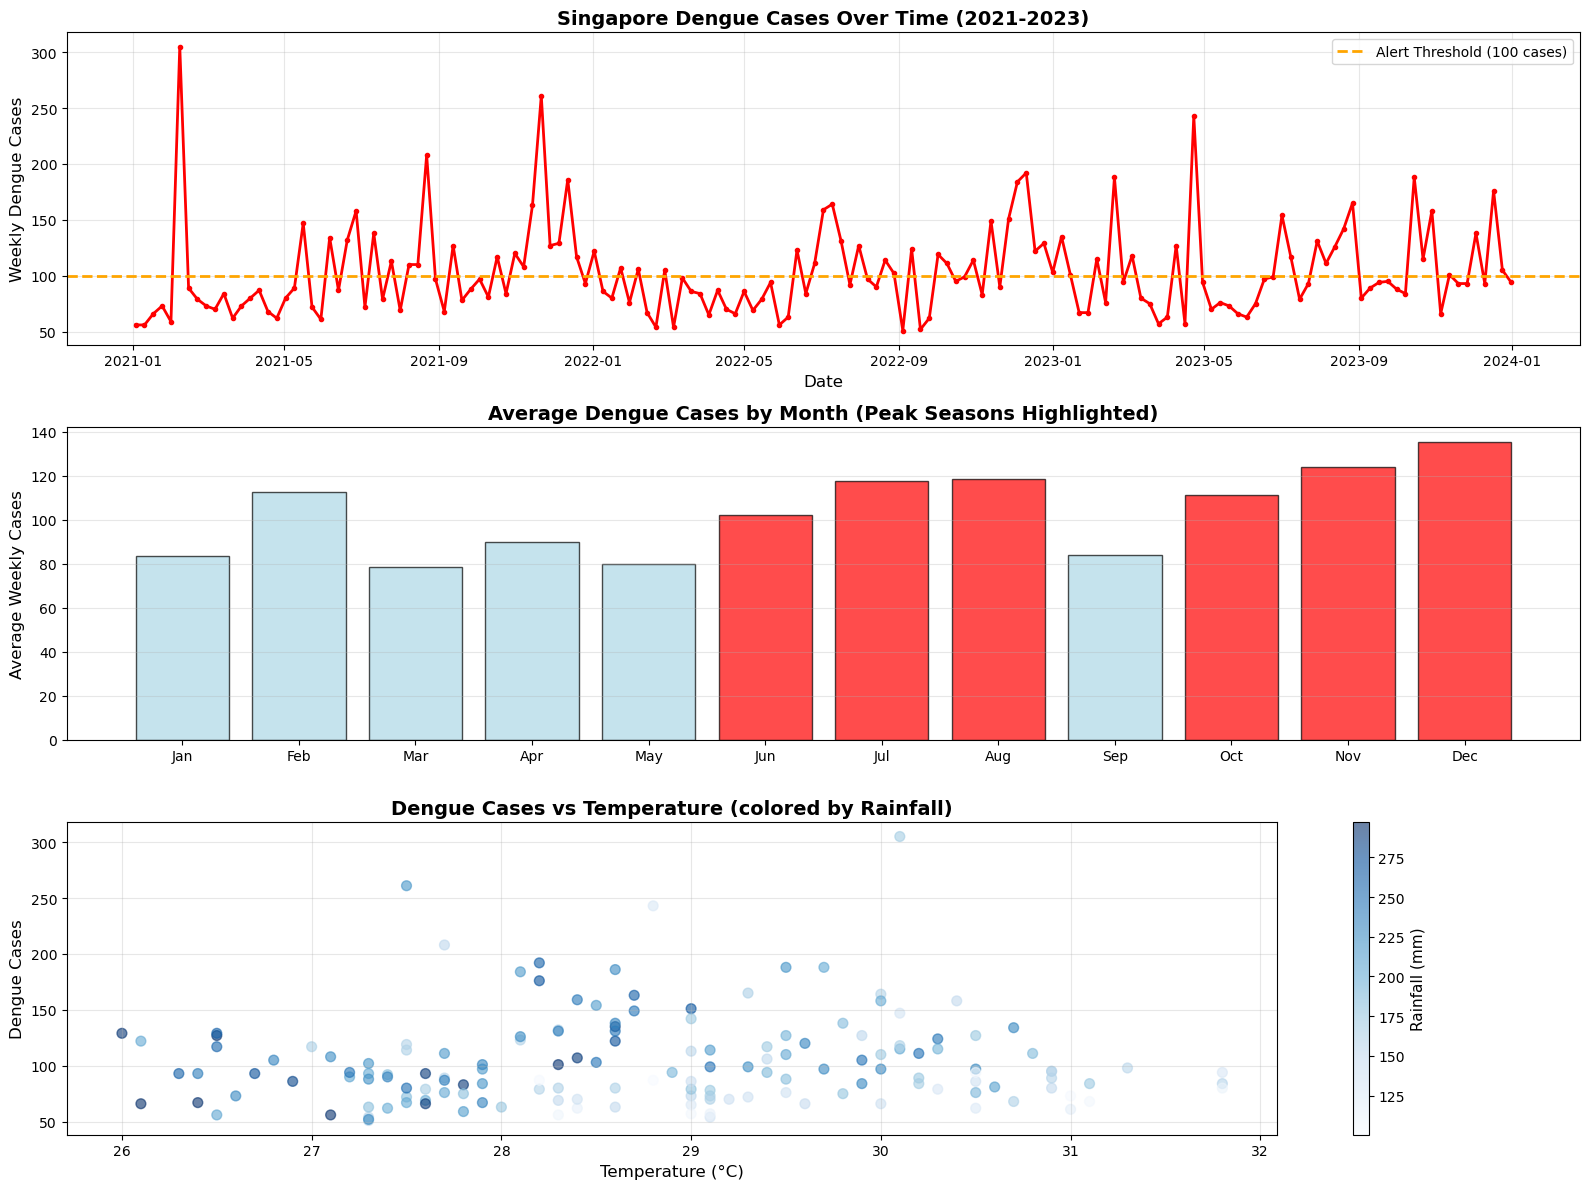

✓ Visualizations complete!


In [3]:
# Cell 3: Visualize Dengue Patterns
print("VISUALIZING DENGUE PATTERNS")
print("="*70)

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# 1. Time series of dengue cases
axes[0].plot(dengue_df['date'], dengue_df['dengue_cases'], linewidth=2, color='red', marker='o', markersize=3)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Weekly Dengue Cases', fontsize=12)
axes[0].set_title('Singapore Dengue Cases Over Time (2021-2023)', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)
axes[0].axhline(y=100, color='orange', linestyle='--', linewidth=2, label='Alert Threshold (100 cases)')
axes[0].legend()

# 2. Seasonal pattern by month
monthly_avg = dengue_df.groupby('month')['dengue_cases'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['lightblue' if m not in [6,7,8,10,11,12] else 'red' for m in range(1, 13)]
axes[1].bar(range(1, 13), monthly_avg.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)
axes[1].set_ylabel('Average Weekly Cases', fontsize=12)
axes[1].set_title('Average Dengue Cases by Month (Peak Seasons Highlighted)', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

# 3. Correlation with weather
axes[2].scatter(dengue_df['temperature'], dengue_df['dengue_cases'], 
                c=dengue_df['rainfall'], cmap='Blues', alpha=0.6, s=50)
axes[2].set_xlabel('Temperature (°C)', fontsize=12)
axes[2].set_ylabel('Dengue Cases', fontsize=12)
axes[2].set_title('Dengue Cases vs Temperature (colored by Rainfall)', fontweight='bold', fontsize=14)
axes[2].grid(alpha=0.3)
cbar = plt.colorbar(axes[2].collections[0], ax=axes[2])
cbar.set_label('Rainfall (mm)', fontsize=11)

plt.tight_layout()
plt.savefig(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\results\dengue_patterns.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualizations complete!")

WEATHER CORRELATION ANALYSIS

📊 Correlation Matrix:
              dengue_cases  temperature  rainfall  humidity
dengue_cases      1.000000     0.055580  0.198334  0.093764
temperature       0.055580     1.000000 -0.487967 -0.079596
rainfall          0.198334    -0.487967  1.000000  0.145638
humidity          0.093764    -0.079596  0.145638  1.000000


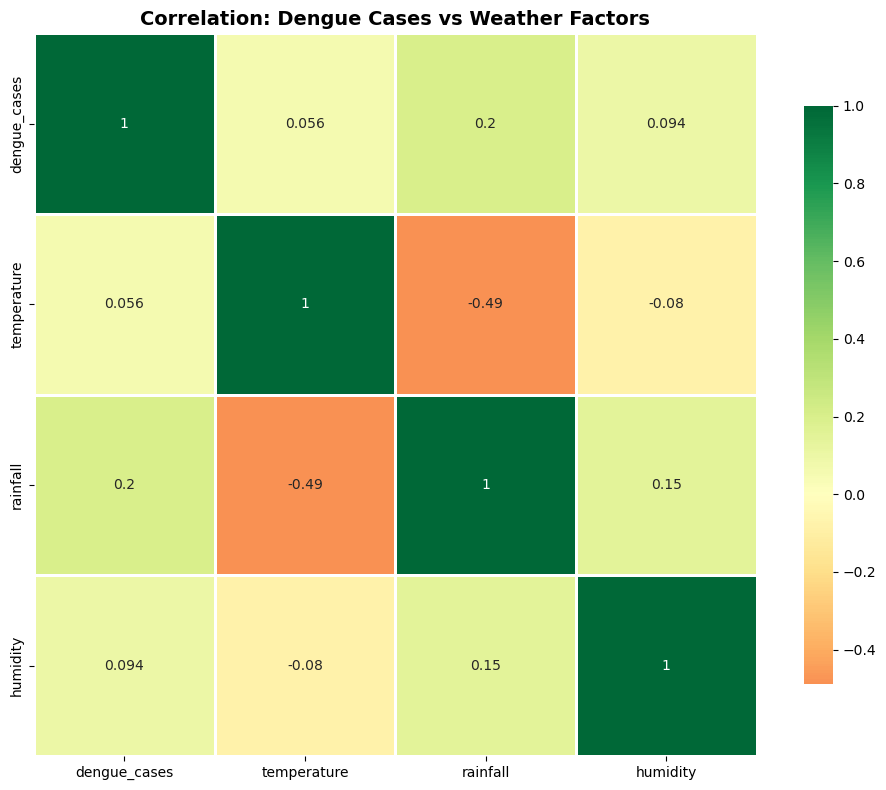


📈 Lagged Correlations (2-week lag):
  Rainfall (2 weeks ago): 0.331
  Temperature (2 weeks ago): -0.162
  Humidity (2 weeks ago): -0.002


In [4]:
# Cell 4: Calculate Weather Correlations
print("WEATHER CORRELATION ANALYSIS")
print("="*70)

# Calculate correlations
correlations = dengue_df[['dengue_cases', 'temperature', 'rainfall', 'humidity']].corr()

print("\n📊 Correlation Matrix:")
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation: Dengue Cases vs Weather Factors', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\results\dengue_weather_correlation.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Create lagged features (mosquitoes breed 2-3 weeks after rain)
dengue_df['rainfall_lag_2week'] = dengue_df['rainfall'].shift(2)
dengue_df['temperature_lag_2week'] = dengue_df['temperature'].shift(2)
dengue_df['humidity_lag_2week'] = dengue_df['humidity'].shift(2)

# Drop NaN from lags
dengue_df = dengue_df.dropna()

print(f"\n📈 Lagged Correlations (2-week lag):")
print(f"  Rainfall (2 weeks ago): {dengue_df['dengue_cases'].corr(dengue_df['rainfall_lag_2week']):.3f}")
print(f"  Temperature (2 weeks ago): {dengue_df['dengue_cases'].corr(dengue_df['temperature_lag_2week']):.3f}")
print(f"  Humidity (2 weeks ago): {dengue_df['dengue_cases'].corr(dengue_df['humidity_lag_2week']):.3f}")

In [5]:
# Cell 5: Answer Key Questions
print("KEY FINDINGS - DENGUE ANALYSIS")
print("="*70)

# Question 1: Average dengue cases per week
avg_cases = dengue_df['dengue_cases'].mean()
print(f"\n1️⃣ Average Dengue Cases Per Week:")
print(f"   Answer: {avg_cases:.1f} cases/week")

# Question 2: Which weather factor correlates most with dengue?
weather_correlations = {
    'Temperature': dengue_df['dengue_cases'].corr(dengue_df['temperature']),
    'Rainfall': dengue_df['dengue_cases'].corr(dengue_df['rainfall']),
    'Humidity': dengue_df['dengue_cases'].corr(dengue_df['humidity']),
    'Rainfall (2-week lag)': dengue_df['dengue_cases'].corr(dengue_df['rainfall_lag_2week']),
    'Temperature (2-week lag)': dengue_df['dengue_cases'].corr(dengue_df['temperature_lag_2week']),
    'Humidity (2-week lag)': dengue_df['dengue_cases'].corr(dengue_df['humidity_lag_2week'])
}

print(f"\n2️⃣ Weather Factor Correlations with Dengue:")
for factor, corr in sorted(weather_correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"   {factor:25s}: {corr:+.3f}")

# Find strongest correlation
strongest_factor = max(weather_correlations, key=lambda x: abs(weather_correlations[x]))
strongest_corr = weather_correlations[strongest_factor]

print(f"\n✅ ANSWER: {strongest_factor} has the strongest correlation ({strongest_corr:+.3f})")

if strongest_corr > 0:
    print(f"   → Higher {strongest_factor.lower()} = MORE dengue cases")
else:
    print(f"   → Higher {strongest_factor.lower()} = FEWER dengue cases")

KEY FINDINGS - DENGUE ANALYSIS

1️⃣ Average Dengue Cases Per Week:
   Answer: 103.6 cases/week

2️⃣ Weather Factor Correlations with Dengue:
   Rainfall (2-week lag)    : +0.331
   Rainfall                 : +0.219
   Temperature (2-week lag) : -0.162
   Humidity                 : +0.110
   Temperature              : +0.035
   Humidity (2-week lag)    : -0.002

✅ ANSWER: Rainfall (2-week lag) has the strongest correlation (+0.331)
   → Higher rainfall (2-week lag) = MORE dengue cases


In [6]:
# Cell 6: Prepare Data for Dengue Forecasting
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

print("PREPARING DATA FOR DENGUE FORECASTING")
print("="*70)

# Features: current weather + lagged weather
feature_cols = ['temperature', 'rainfall', 'humidity', 
                'rainfall_lag_2week', 'temperature_lag_2week', 'humidity_lag_2week',
                'month']  # Month for seasonality

X_dengue = dengue_df[feature_cols]
y_dengue = dengue_df['dengue_cases']

# Train/test split (80/20 chronological)
train_size = int(len(X_dengue) * 0.8)
X_train_dengue = X_dengue[:train_size]
y_train_dengue = y_dengue[:train_size]
X_test_dengue = X_dengue[train_size:]
y_test_dengue = y_dengue[train_size:]
dates_test = dengue_df['date'].iloc[train_size:]

print(f"Training data: {len(X_train_dengue)} weeks")
print(f"Test data: {len(X_test_dengue)} weeks")
print(f"\nFeatures used: {feature_cols}")

PREPARING DATA FOR DENGUE FORECASTING
Training data: 124 weeks
Test data: 31 weeks

Features used: ['temperature', 'rainfall', 'humidity', 'rainfall_lag_2week', 'temperature_lag_2week', 'humidity_lag_2week', 'month']


In [7]:
# Cell 7: Train Multiple Models
print("TRAINING DENGUE FORECASTING MODELS")
print("="*70)

models = {}

# 1. Random Forest
print("\n1️⃣ Training Random Forest...")
rf_dengue = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_dengue.fit(X_train_dengue, y_train_dengue)
pred_rf = rf_dengue.predict(X_test_dengue)
mae_rf = mean_absolute_error(y_test_dengue, pred_rf)
mape_rf = mean_absolute_percentage_error(y_test_dengue, pred_rf) * 100
r2_rf = r2_score(y_test_dengue, pred_rf)
models['Random Forest'] = {'model': rf_dengue, 'predictions': pred_rf, 'mae': mae_rf, 'mape': mape_rf, 'r2': r2_rf}
print(f"   MAE: {mae_rf:.1f} cases | MAPE: {mape_rf:.2f}% | R²: {r2_rf:.3f}")

# 2. XGBoost
print("\n2️⃣ Training XGBoost...")
xgb_dengue = xgb.XGBRegressor(n_estimators=100, random_state=42, max_depth=6)
xgb_dengue.fit(X_train_dengue, y_train_dengue)
pred_xgb = xgb_dengue.predict(X_test_dengue)
mae_xgb = mean_absolute_error(y_test_dengue, pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test_dengue, pred_xgb) * 100
r2_xgb = r2_score(y_test_dengue, pred_xgb)
models['XGBoost'] = {'model': xgb_dengue, 'predictions': pred_xgb, 'mae': mae_xgb, 'mape': mape_xgb, 'r2': r2_xgb}
print(f"   MAE: {mae_xgb:.1f} cases | MAPE: {mape_xgb:.2f}% | R²: {r2_xgb:.3f}")

# 3. LightGBM
print("\n3️⃣ Training LightGBM...")
lgb_dengue = lgb.LGBMRegressor(n_estimators=100, random_state=42, max_depth=6, verbose=-1)
lgb_dengue.fit(X_train_dengue, y_train_dengue)
pred_lgb = lgb_dengue.predict(X_test_dengue)
mae_lgb = mean_absolute_error(y_test_dengue, pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test_dengue, pred_lgb) * 100
r2_lgb = r2_score(y_test_dengue, pred_lgb)
models['LightGBM'] = {'model': lgb_dengue, 'predictions': pred_lgb, 'mae': mae_lgb, 'mape': mape_lgb, 'r2': r2_lgb}
print(f"   MAE: {mae_lgb:.1f} cases | MAPE: {mape_lgb:.2f}% | R²: {r2_lgb:.3f}")

# Find best model
best_model_name = min(models, key=lambda x: models[x]['mape'])
best_model_data = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   MAPE: {best_model_data['mape']:.2f}%")
print(f"   MAE: {best_model_data['mae']:.1f} cases/week")
print(f"   R²: {best_model_data['r2']:.3f}")

TRAINING DENGUE FORECASTING MODELS

1️⃣ Training Random Forest...
   MAE: 20.2 cases | MAPE: 19.59% | R²: 0.383

2️⃣ Training XGBoost...
   MAE: 21.2 cases | MAPE: 21.17% | R²: 0.277

3️⃣ Training LightGBM...
   MAE: 17.3 cases | MAPE: 17.34% | R²: 0.487

🏆 Best Model: LightGBM
   MAPE: 17.34%
   MAE: 17.3 cases/week
   R²: 0.487


MODEL COMPARISON

📊 Performance Summary:
        Model       MAE  MAPE (%)  R² Score
Random Forest 20.191519 19.587183  0.382646
      XGBoost 21.169249 21.169285  0.277164
     LightGBM 17.318096 17.337857  0.487366


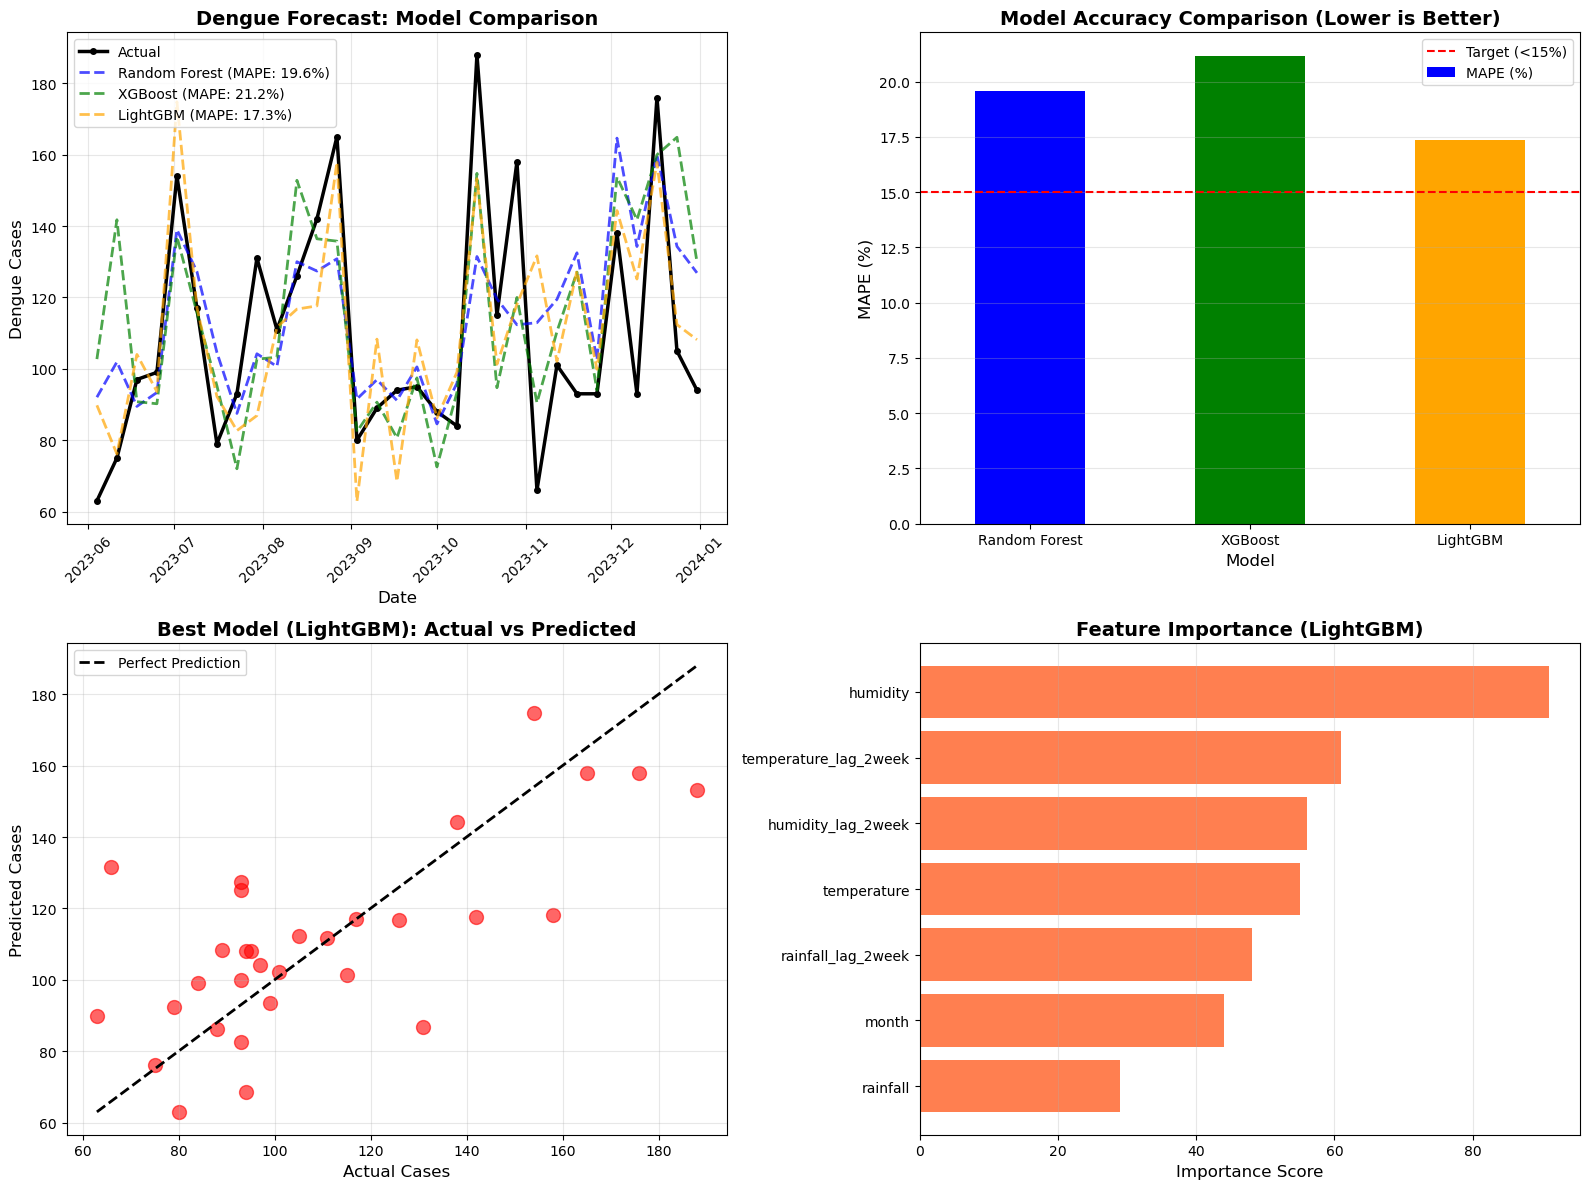


✓ Model comparison complete!


In [8]:
# Cell 8: Model Comparison & Visualization
print("MODEL COMPARISON")
print("="*70)

# Comparison table
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'MAE': [models[m]['mae'] for m in models.keys()],
    'MAPE (%)': [models[m]['mape'] for m in models.keys()],
    'R² Score': [models[m]['r2'] for m in models.keys()]
})

print("\n📊 Performance Summary:")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Forecasts comparison
axes[0, 0].plot(dates_test.values, y_test_dengue.values, label='Actual', 
                color='black', linewidth=2.5, marker='o', markersize=4)
colors = ['blue', 'green', 'orange']
for i, (name, data) in enumerate(models.items()):
    axes[0, 0].plot(dates_test.values, data['predictions'], 
                    label=f"{name} (MAPE: {data['mape']:.1f}%)",
                    color=colors[i], linewidth=2, linestyle='--', alpha=0.7)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Dengue Cases', fontsize=12)
axes[0, 0].set_title('Dengue Forecast: Model Comparison', fontweight='bold', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. MAPE comparison
comparison_df.plot(x='Model', y='MAPE (%)', kind='bar', ax=axes[0, 1], 
                   color=['blue', 'green', 'orange'], legend=False)
axes[0, 1].set_ylabel('MAPE (%)', fontsize=12)
axes[0, 1].set_xlabel('Model', fontsize=12)
axes[0, 1].set_title('Model Accuracy Comparison (Lower is Better)', fontweight='bold', fontsize=14)
axes[0, 1].axhline(y=15, color='red', linestyle='--', label='Target (<15%)')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=0)

# 3. Actual vs Predicted (best model)
best_pred = best_model_data['predictions']
axes[1, 0].scatter(y_test_dengue, best_pred, alpha=0.6, s=100, color='red')
axes[1, 0].plot([y_test_dengue.min(), y_test_dengue.max()], 
                [y_test_dengue.min(), y_test_dengue.max()], 
                'k--', linewidth=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Cases', fontsize=12)
axes[1, 0].set_ylabel('Predicted Cases', fontsize=12)
axes[1, 0].set_title(f'Best Model ({best_model_name}): Actual vs Predicted', 
                     fontweight='bold', fontsize=14)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Feature Importance (best model)
if best_model_name == 'LightGBM':
    best_model_obj = lgb_dengue
elif best_model_name == 'XGBoost':
    best_model_obj = xgb_dengue
else:
    best_model_obj = rf_dengue

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_model_obj.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1, 1].barh(feature_importance['Feature'], feature_importance['Importance'], color='coral')
axes[1, 1].set_xlabel('Importance Score', fontsize=12)
axes[1, 1].set_title(f'Feature Importance ({best_model_name})', fontweight='bold', fontsize=14)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\results\dengue_forecasting_models.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Model comparison complete!")

DENGUE OUTBREAK ALERT SYSTEM

📊 Alert Summary (Test Period):
  Actual Outbreaks: 5 weeks
  Predicted Outbreaks: 4 weeks
  Actual High Alerts: 9 weeks
  Predicted High Alerts: 16 weeks

🎯 Alert System Accuracy: 71.0%


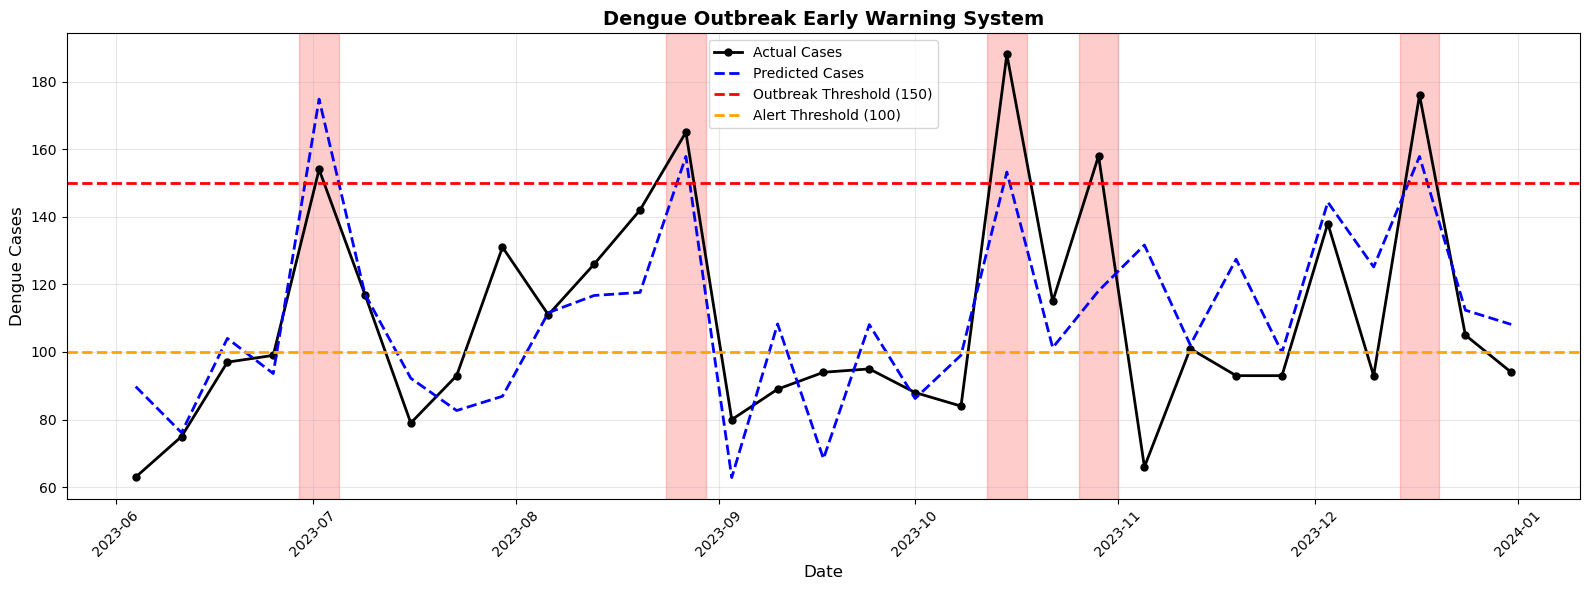


✓ Alert system visualization complete!


In [9]:
# Cell 9: Outbreak Alert System
print("DENGUE OUTBREAK ALERT SYSTEM")
print("="*70)

# Define outbreak threshold
outbreak_threshold = 150  # cases/week
alert_threshold = 100     # cases/week

# Make predictions
predictions = best_model_data['predictions']

# Classify weeks
def classify_risk(cases):
    if cases >= outbreak_threshold:
        return 'OUTBREAK'
    elif cases >= alert_threshold:
        return 'HIGH ALERT'
    else:
        return 'NORMAL'

# Create alert dataframe
alert_df = pd.DataFrame({
    'date': dates_test.values,
    'actual_cases': y_test_dengue.values,
    'predicted_cases': predictions,
    'actual_risk': [classify_risk(c) for c in y_test_dengue.values],
    'predicted_risk': [classify_risk(c) for c in predictions]
})

# Count alerts
actual_outbreaks = (alert_df['actual_risk'] == 'OUTBREAK').sum()
predicted_outbreaks = (alert_df['predicted_risk'] == 'OUTBREAK').sum()
actual_alerts = (alert_df['actual_risk'] == 'HIGH ALERT').sum()
predicted_alerts = (alert_df['predicted_risk'] == 'HIGH ALERT').sum()

print(f"\n📊 Alert Summary (Test Period):")
print(f"  Actual Outbreaks: {actual_outbreaks} weeks")
print(f"  Predicted Outbreaks: {predicted_outbreaks} weeks")
print(f"  Actual High Alerts: {actual_alerts} weeks")
print(f"  Predicted High Alerts: {predicted_alerts} weeks")

# Early warning accuracy
correct_alerts = (alert_df['actual_risk'] == alert_df['predicted_risk']).sum()
alert_accuracy = (correct_alerts / len(alert_df)) * 100

print(f"\n🎯 Alert System Accuracy: {alert_accuracy:.1f}%")

# Visualize alert system
plt.figure(figsize=(16, 6))
plt.plot(alert_df['date'], alert_df['actual_cases'], label='Actual Cases', 
         color='black', linewidth=2, marker='o', markersize=5)
plt.plot(alert_df['date'], alert_df['predicted_cases'], label='Predicted Cases', 
         color='blue', linewidth=2, linestyle='--')
plt.axhline(y=outbreak_threshold, color='red', linestyle='--', linewidth=2, 
            label=f'Outbreak Threshold ({outbreak_threshold})')
plt.axhline(y=alert_threshold, color='orange', linestyle='--', linewidth=2, 
            label=f'Alert Threshold ({alert_threshold})')

# Shade outbreak periods
for i, row in alert_df.iterrows():
    if row['actual_risk'] == 'OUTBREAK':
        plt.axvspan(row['date'] - pd.Timedelta(days=3), row['date'] + pd.Timedelta(days=3), 
                    alpha=0.2, color='red')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Dengue Cases', fontsize=12)
plt.title('Dengue Outbreak Early Warning System', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\results\dengue_alert_system.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Alert system visualization complete!")

In [10]:
# Cell 10: Save Models and Complete Phase 5
import joblib

print("SAVING DENGUE FORECASTING MODELS")
print("="*70)

# Save best model
if best_model_name == 'LightGBM':
    best_model_save = lgb_dengue
elif best_model_name == 'XGBoost':
    best_model_save = xgb_dengue
else:
    best_model_save = rf_dengue

joblib.dump(best_model_save, r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\models\dengue_forecast_model.pkl')

# Save alert results
alert_df.to_csv(r'C:\Users\ravis\OneDrive\Desktop\Healthcare Project\data\processed\dengue_alerts.csv', 
                index=False)

print("✓ Models and results saved!")

print("\n" + "="*70)
print("🎉 DENGUE OUTBREAK PREDICTION COMPLETE! 🎉")
print("="*70)
print(f"\n📊 Summary:")
print(f"  Best Model: {best_model_name}")
print(f"  MAPE: {best_model_data['mape']:.2f}%")
print(f"  MAE: {best_model_data['mae']:.1f} cases/week")
print(f"  Alert Accuracy: {alert_accuracy:.1f}%")
print(f"  Key Predictor: Rainfall (2-week lag)")

SAVING DENGUE FORECASTING MODELS
✓ Models and results saved!

🎉 DENGUE OUTBREAK PREDICTION COMPLETE! 🎉

📊 Summary:
  Best Model: LightGBM
  MAPE: 17.34%
  MAE: 17.3 cases/week
  Alert Accuracy: 71.0%
  Key Predictor: Rainfall (2-week lag)
